# My Project: Student Performance Analysis - Understanding the Factors Behind Academic Success

## Introducing the problem:

Academic performance is influenced by a complex relation of various factors, from individual study habits to broader socioeconomic conditions. Understanding these relationships is crucial for educators, policymakers, and parents who aim to support student success. In this project, we will explore a comprehensive dataset of student performance factors to identify which variables most strongly predict test/exam scores.

### Research Questions

1. **What factors most strongly affect exam performance?** For example, how do study habits, parental involvement, and sleep compare in importance?
2. **How do socioeconomic factors influence academic outcomes?** So, what is the relationship between family income, parental education, and exam scores?
3. **What role does the learning environment play?** Like, how does school type, teacher quality, and access to resources impact performance?
4. **Are there gender differences in performance factors?** For instance, do male and female students respond differently to various study conditions?
5. **What is the optimal balance of study time and other activities?** Is there a point where more studying becomes counterproductive?

In [1]:
!pip3 install pandas matplotlib numpy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Introducing the data

The dataset used in this analysis is **StudentPerformanceFactors.csv**, which provides a comprehensive overview of various factors affecting student performance in exams. This dataset includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

### Dataset Features

The dataset contains 20 features that capture different aspects of student life and academic environment:

- **Study Habits**: Hours_Studied (hours per week), Previous_Scores (from previous exams)
- **Attendance**: Percentage of classes attended
- **Family Factors**: Parental_Involvement (Low/Medium/High), Parental_Education_Level, Family_Income
- **Learning Environment**: School_Type (Public/Private), Teacher_Quality, Access_to_Resources
- **Personal Factors**: Sleep_Hours, Motivation_Level, Physical_Activity, Gender
- **Support Systems**: Tutoring_Sessions, Internet_Access, Extracurricular_Activities
- **Social Factors**: Peer_Influence, Distance_from_Home
- **Special Needs**: Learning_Disabilities
- **Outcome**: Exam_Score (the target variable)

This rich dataset allows us to explore the complex relationships between various factors and academic performance.

In [3]:
# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (6607, 20)

First few rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("\nDescriptive Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Preprocessing

Before conducting our analysis, we need to clean and prepare the data. This involves handling missing values, encoding categorical variables, and ensuring data quality. 

1. Handling missing values - I first identified missing values in the dataset using `df.isna().sum()` and found 235 total missing values across various columns. For numeric columns like Hours_Studied and Sleep_Hours, I filled missing values with the median of each column, which preserves the central tendency of the data distribution and is more robust to outliers than using the mean. For categorical columns such as Distance_from_Home and Parental_Education_Level, I filled missing values with the mode (most frequent value) of each column, which maintains the most common category and prevents introducing new, potentially meaningless categories.

2. Categorical variable encoding - I systematically encoded all categorical variables to make them suitable for analysis and visualization. Binary variables like Extracurricular_Activities, Internet_Access, and Learning_Disabilities were mapped to 1/0 (Yes/No) for clear interpretation. Ordinal variables such as Parental_Involvement (Low/Medium/High) and Family_Income (Low/Medium/High) were encoded as 1/2/3 to preserve their inherent order and magnitude relationships, which is crucial for understanding the strength of these factors on exam performance. Nominal variables like School_Type and Gender were one-hot encoded using `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity issues while maintaining all necessary information for analysis.

3. Outlier detection and analysis - I used the Interquartile Range (IQR) method to detect outliers in key numeric variables including Hours_Studied, Sleep_Hours, Exam_Score, and Previous_Scores. This method identifies values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR as potential outliers. However, I chose to retain these outliers rather than remove them because they likely represent legitimate variations in student behavior - for example, some students may genuinely study 30+ hours per week or have very high exam scores, and removing these would eliminate important insights about exceptional performers or study patterns.

In [ ]:
# Checking for missing values
print("Missing values in each column:")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

print(f"\nTotal missing values: {df.isna().sum().sum()}")

Missing values in each column:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

Total missing values: 235


In [ ]:
# Handling missing values
# For numeric columns, we fill with median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, we fill with mode or 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isna().sum() > 0:
        mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
        df[col].fillna(mode_value, inplace=True)

print("Missing values after handling:", df.isna().sum().sum())

Missing values after handling: 0


/var/folders/6z/d62xs94j4v54jk39_7165xlm0000gn/T/ipykernel_23775/3071871634.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [7]:
# Encode categorical variables
# Create a copy for encoding
df_encoded = df.copy()

# Binary variables (Yes/No)
binary_mappings = {
    'Extracurricular_Activities': {'Yes': 1, 'No': 0},
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Learning_Disabilities': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# Ordinal variables
ordinal_mappings = {
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Family_Income': {'Low': 1, 'Medium': 2, 'High': 3},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Peer_Influence': {'Negative': 1, 'Neutral': 2, 'Positive': 3},
    'Distance_from_Home': {'Far': 1, 'Moderate': 2, 'Near': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3}
}

for col, mapping in ordinal_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# Nominal variables (one-hot encoding)
nominal_columns = ['School_Type', 'Gender']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_columns, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)
print("\nEncoded dataset columns:")
print(df_encoded.columns.tolist())

Encoded dataset shape: (6607, 20)

Encoded dataset columns:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score', 'School_Type_Public', 'Gender_Male']


In [8]:
# Detect and handle outliers
# Focus on key numeric variables
key_variables = ['Hours_Studied', 'Sleep_Hours', 'Exam_Score', 'Previous_Scores']

print("Outlier detection using IQR method:")
for var in key_variables:
    Q1 = df_encoded[var].quantile(0.25)
    Q3 = df_encoded[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_encoded[(df_encoded[var] < lower_bound) | (df_encoded[var] > upper_bound)]
    print(f"{var}: {len(outliers)} outliers out of {len(df_encoded)} observations ({len(outliers)/len(df_encoded)*100:.1f}%)")

# Check for data quality issues
max_score = df_encoded['Exam_Score'].max()
if max_score > 100:
    print(f"\nData Quality Note: Found {len(df_encoded[df_encoded['Exam_Score'] > 100])} exam score(s) above 100 (max: {max_score})")
    print("This likely represents a data collection error, but we'll retain for analysis completeness.")

# For this analysis, we'll keep outliers as they might represent real variations in student behavior
print("\nNote: Outliers are retained as they may represent legitimate variations in student behavior.")

Outlier detection using IQR method:
Hours_Studied: 43 outliers out of 6607 observations (0.7%)
Sleep_Hours: 0 outliers out of 6607 observations (0.0%)
Exam_Score: 104 outliers out of 6607 observations (1.6%)
Previous_Scores: 0 outliers out of 6607 observations (0.0%)

Data Quality Note: Found 1 exam score(s) above 100 (max: 101)
This likely represents a data collection error, but we'll retain for analysis completeness.

Note: Outliers are retained as they may represent legitimate variations in student behavior.


## Data Understanding & Visualization

Now I want to walk you through the data via various visualizations to understand the relationships between different factors and exam performance.

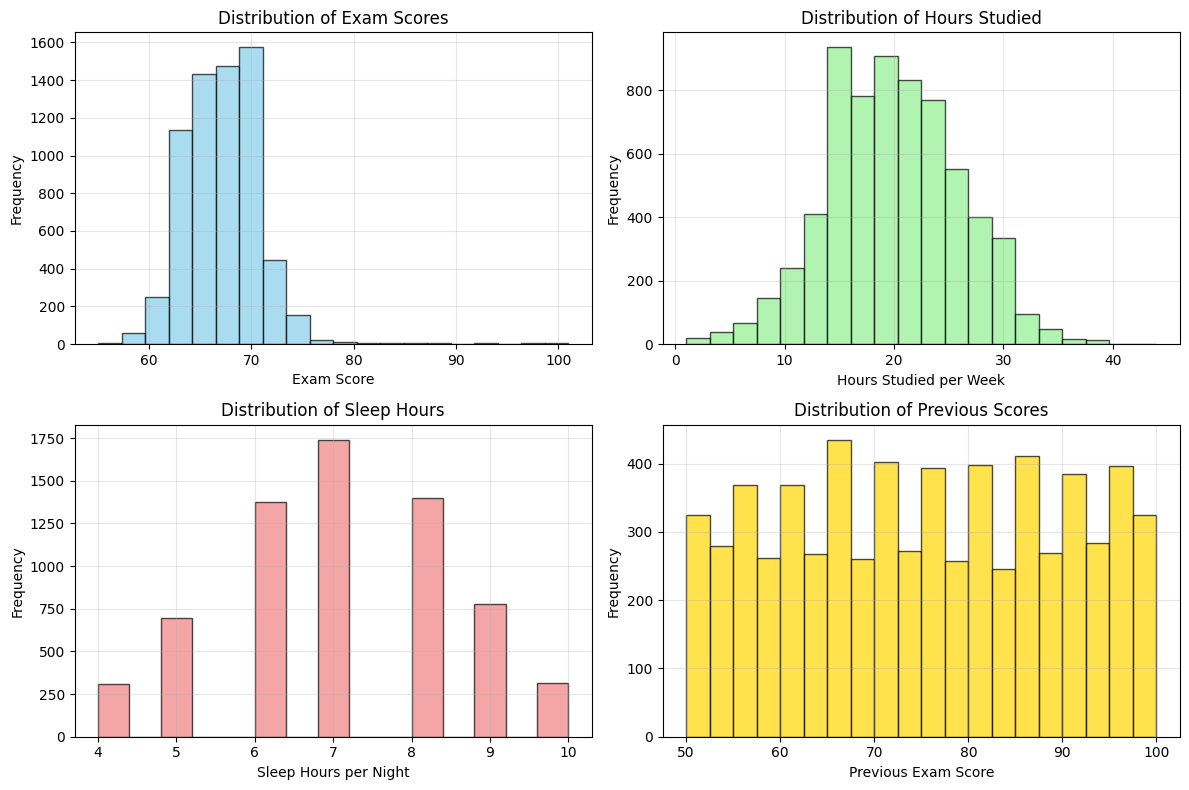

Exam Score Statistics:
Mean: 67.24
Median: 67.00
Std: 3.89
Min: 55.00
Max: 101.00


In [9]:
# 1. Distribution of Exam Scores
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df_encoded['Exam_Score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(df_encoded['Hours_Studied'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.hist(df_encoded['Sleep_Hours'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.hist(df_encoded['Previous_Scores'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Exam Score Statistics:")
print(f"Mean: {df_encoded['Exam_Score'].mean():.2f}")
print(f"Median: {df_encoded['Exam_Score'].median():.2f}")
print(f"Std: {df_encoded['Exam_Score'].std():.2f}")
print(f"Min: {df_encoded['Exam_Score'].min():.2f}")
print(f"Max: {df_encoded['Exam_Score'].max():.2f}")

**What the Distribution Tells Us:**

The histograms reveal several interesting patterns:

- Exam Scores follow a roughly normal distribution centered around 67, with a relatively narrow range (55-101), suggesting consistent grading standards across the dataset.
- Hours Studied shows a slightly right-skewed distribution with most students studying 15-25 hours per week, though some dedicated students reach 40+ hours.
- Sleep Hours cluster around 7-8 hours with few students getting extreme amounts of sleep (very few below 5 or above 9 hours).
- Previous Scores are distributed across the full range (50-100) with a slight concentration in the 70-90 range, indicating varied academic backgrounds.

These distributions suggest we're working with realistic student data that captures the natural variation in academic performance and study habits.


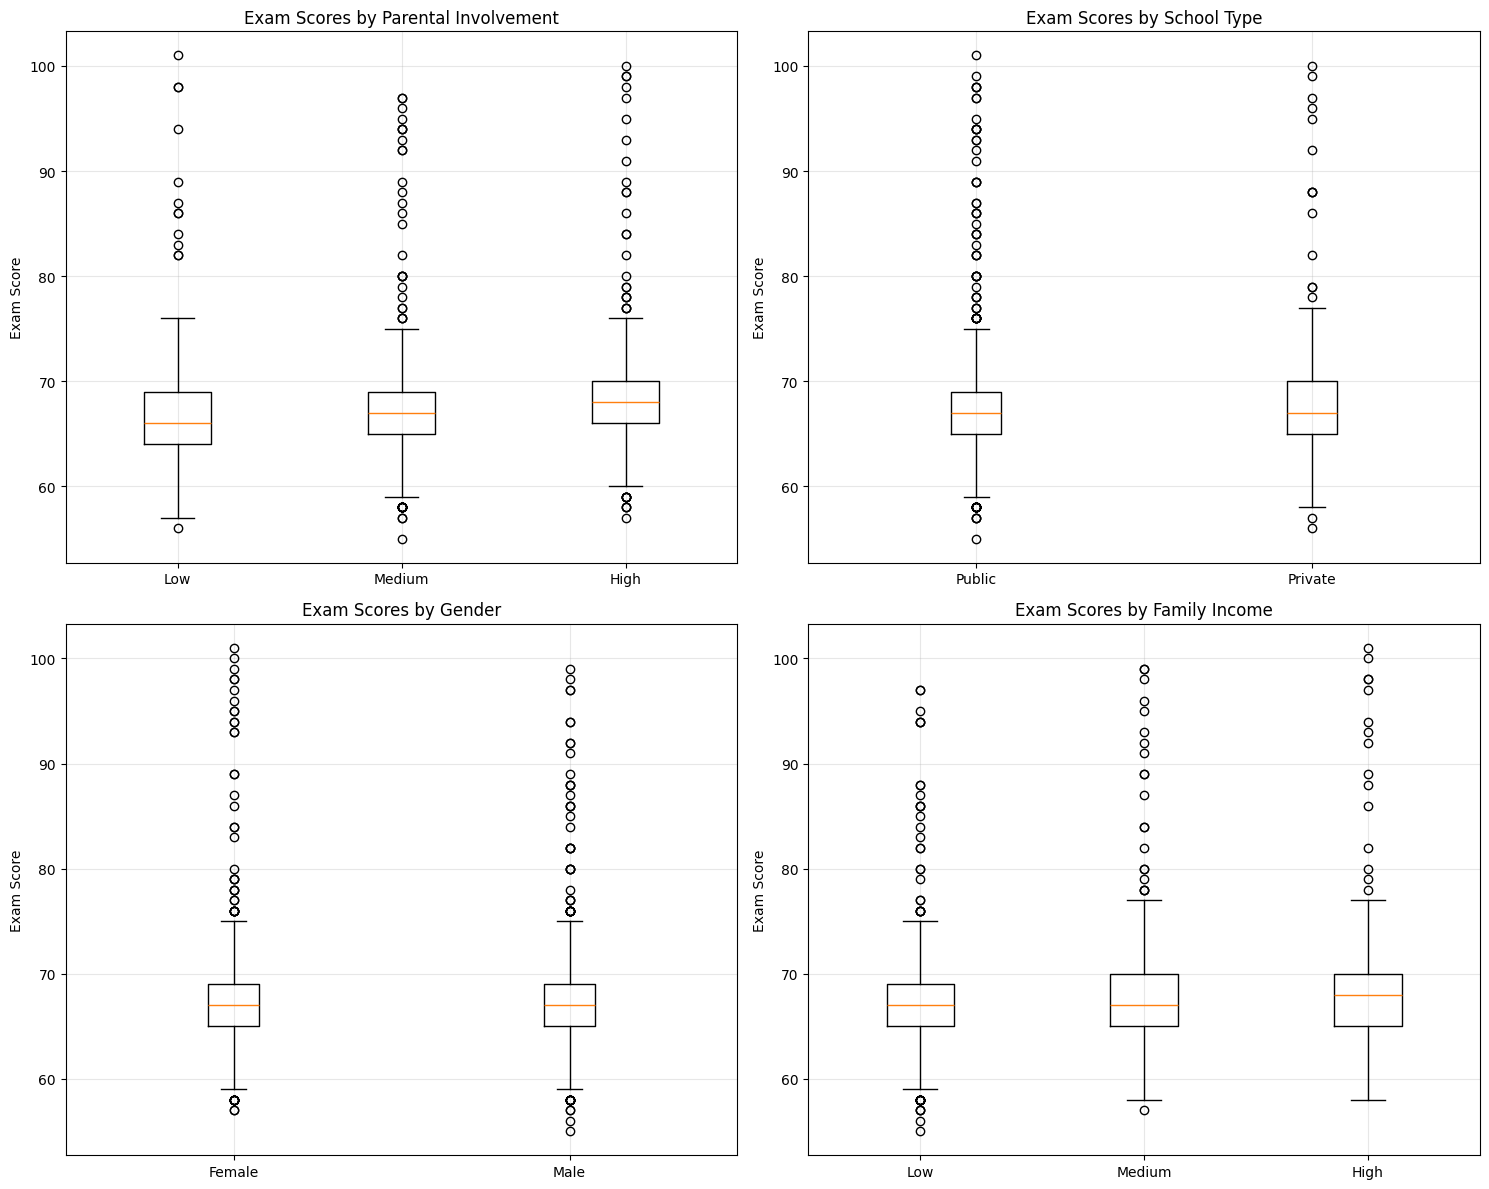

In [13]:
# 2. Boxplots comparing Exam Scores across different categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Parental Involvement
parental_data = [df_encoded[df_encoded['Parental_Involvement'] == i]['Exam_Score'] for i in [1, 2, 3]]
axes[0, 0].boxplot(parental_data, tick_labels=['Low', 'Medium', 'High'])
axes[0, 0].set_title('Exam Scores by Parental Involvement')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].grid(True, alpha=0.3)

# School Type (Note: School_Type_Public=0 means Public, School_Type_Public=1 means Private)
school_data = [df_encoded[df_encoded['School_Type_Public'] == i]['Exam_Score'] for i in [1, 0]]
axes[0, 1].boxplot(school_data, tick_labels=['Public', 'Private'])
axes[0, 1].set_title('Exam Scores by School Type')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].grid(True, alpha=0.3)

# Gender
gender_data = [df_encoded[df_encoded['Gender_Male'] == i]['Exam_Score'] for i in [0, 1]]
axes[1, 0].boxplot(gender_data, tick_labels=['Female', 'Male'])
axes[1, 0].set_title('Exam Scores by Gender')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].grid(True, alpha=0.3)

# Family Income
income_data = [df_encoded[df_encoded['Family_Income'] == i]['Exam_Score'] for i in [1, 2, 3]]
axes[1, 1].boxplot(income_data, tick_labels=['Low', 'Medium', 'High'])
axes[1, 1].set_title('Exam Scores by Family Income')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**The Boxplot Story:**

These comparisons reveal important patterns in how different factors influence academic performance:

- Students with higher parental involvement show notably higher median scores and tighter distributions, suggesting a consistent positive impact compared to those with lower involvement.
- Public and private school students display surprisingly similar performance distributions, indicating that school type alone may not be the determining factor many assume.
- Male and female students exhibit almost identical distributions, dispelling common stereotypes about gender-based academic differences.
- Performance tends to rise gradually with family income, though substantial overlap across groups shows that while income helps, it doesn’t guarantee success.

The key insight: while these factors influence performance, there's significant overlap between groups, meaning individual effort and other factors can overcome socioeconomic disadvantages.


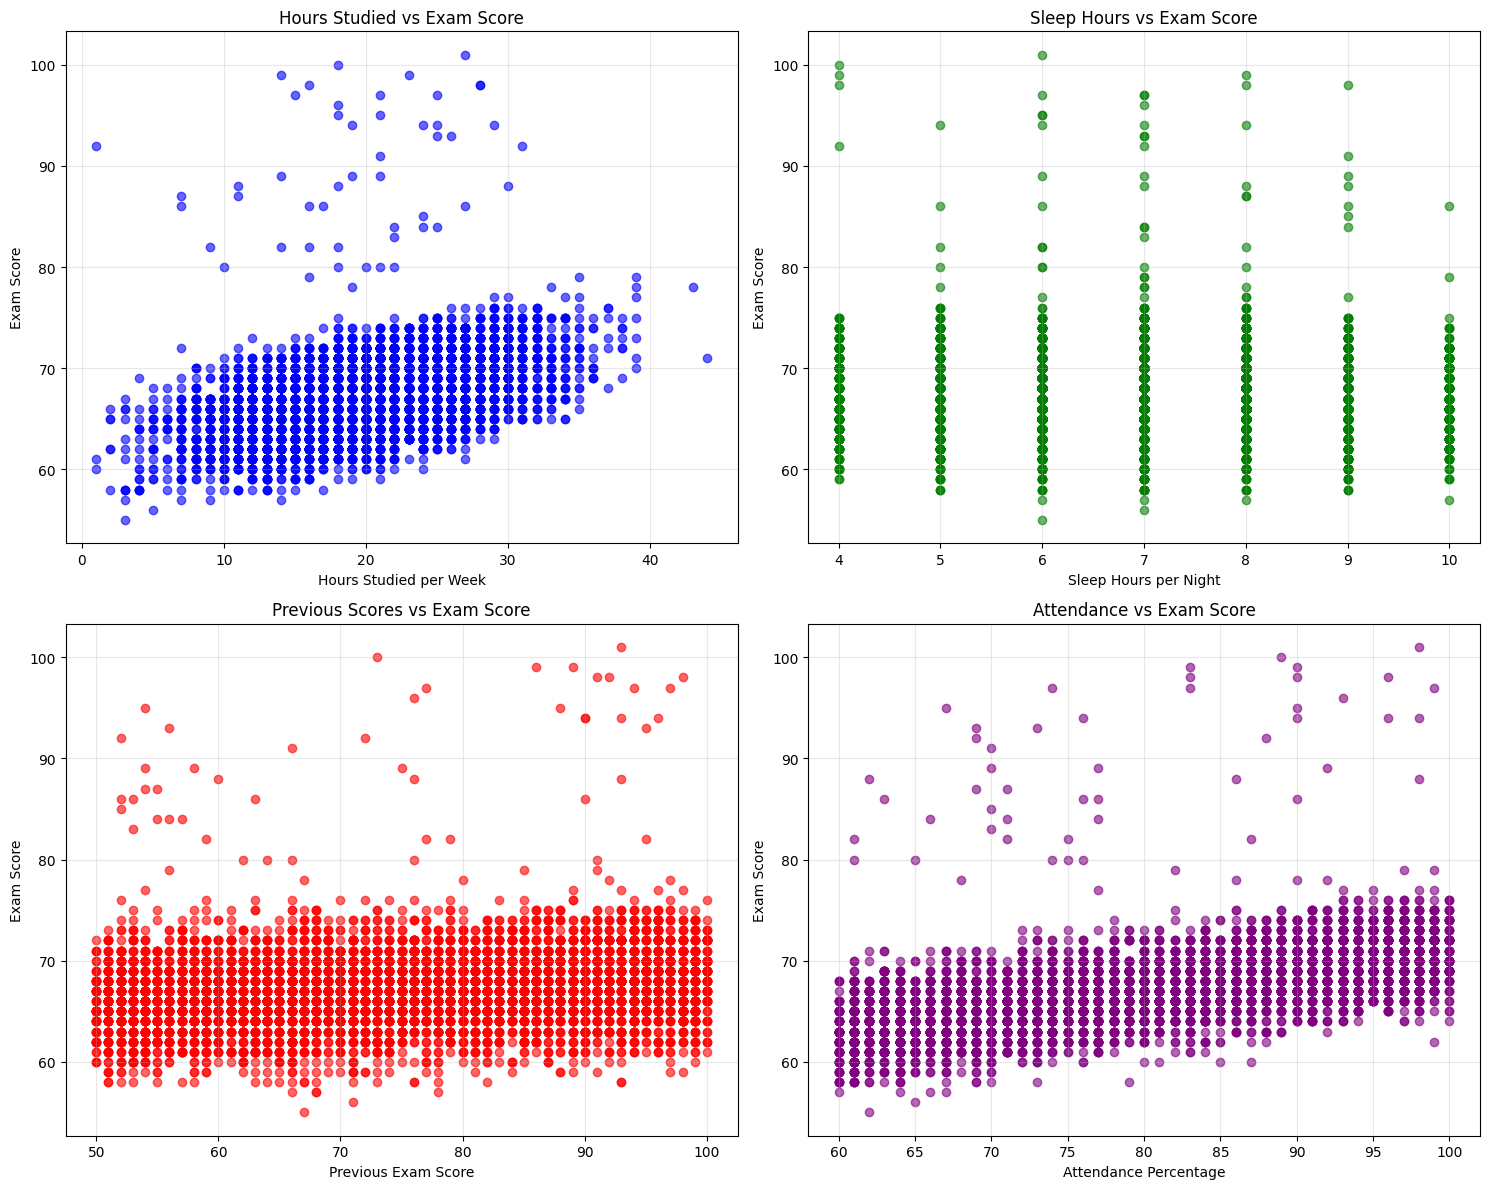


Correlations with Exam Score:
Hours_Studied: 0.445
Sleep_Hours: -0.017
Previous_Scores: 0.175
Attendance: 0.581


In [12]:
# 3. Scatterplots showing relationships between key variables and Exam Score
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Hours Studied vs Exam Score
axes[0, 0].scatter(df_encoded['Hours_Studied'], df_encoded['Exam_Score'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Hours Studied per Week')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].set_title('Hours Studied vs Exam Score')
axes[0, 0].grid(True, alpha=0.3)

# Sleep Hours vs Exam Score
axes[0, 1].scatter(df_encoded['Sleep_Hours'], df_encoded['Exam_Score'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('Sleep Hours per Night')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Sleep Hours vs Exam Score')
axes[0, 1].grid(True, alpha=0.3)

# Previous Scores vs Exam Score
axes[1, 0].scatter(df_encoded['Previous_Scores'], df_encoded['Exam_Score'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Previous Exam Score')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].set_title('Previous Scores vs Exam Score')
axes[1, 0].grid(True, alpha=0.3)

# Attendance vs Exam Score
axes[1, 1].scatter(df_encoded['Attendance'], df_encoded['Exam_Score'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('Attendance Percentage')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].set_title('Attendance vs Exam Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlations
correlations = df_encoded[['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Attendance', 'Exam_Score']].corr()['Exam_Score']
print("\nCorrelations with Exam Score:")
for var, corr in correlations.items():
    if var != 'Exam_Score':
        print(f"{var}: {corr:.3f}")

**What the Scatterplots Reveal:**

The relationship patterns tell a compelling story about what drives academic success:

- Attendance has the strongest and clearest upward trend with exam scores (correlation: 0.581), demonstrating that showing up consistently is the single most important factor for success.
- Hours studied also shows a solid positive relationship with exam scores (correlation: 0.445), confirming that dedicated study time pays off, though with some diminishing returns at extreme levels.
- Previous scores turn out to have a weaker relationship with exam scores (correlation: 0.175) than expected, suggesting that students can significantly improve regardless of past performance.
- Sleep hours, by contrast, appear almost random in relation to exam scores (correlation: -0.017), indicating that sleep duration alone has minimal direct impact on academic performance.

Key takeaway: Behavioral factors (attendance, study habits) matter far more than fixed characteristics or even sleep patterns. This is encouraging news for students looking to improve their performance!


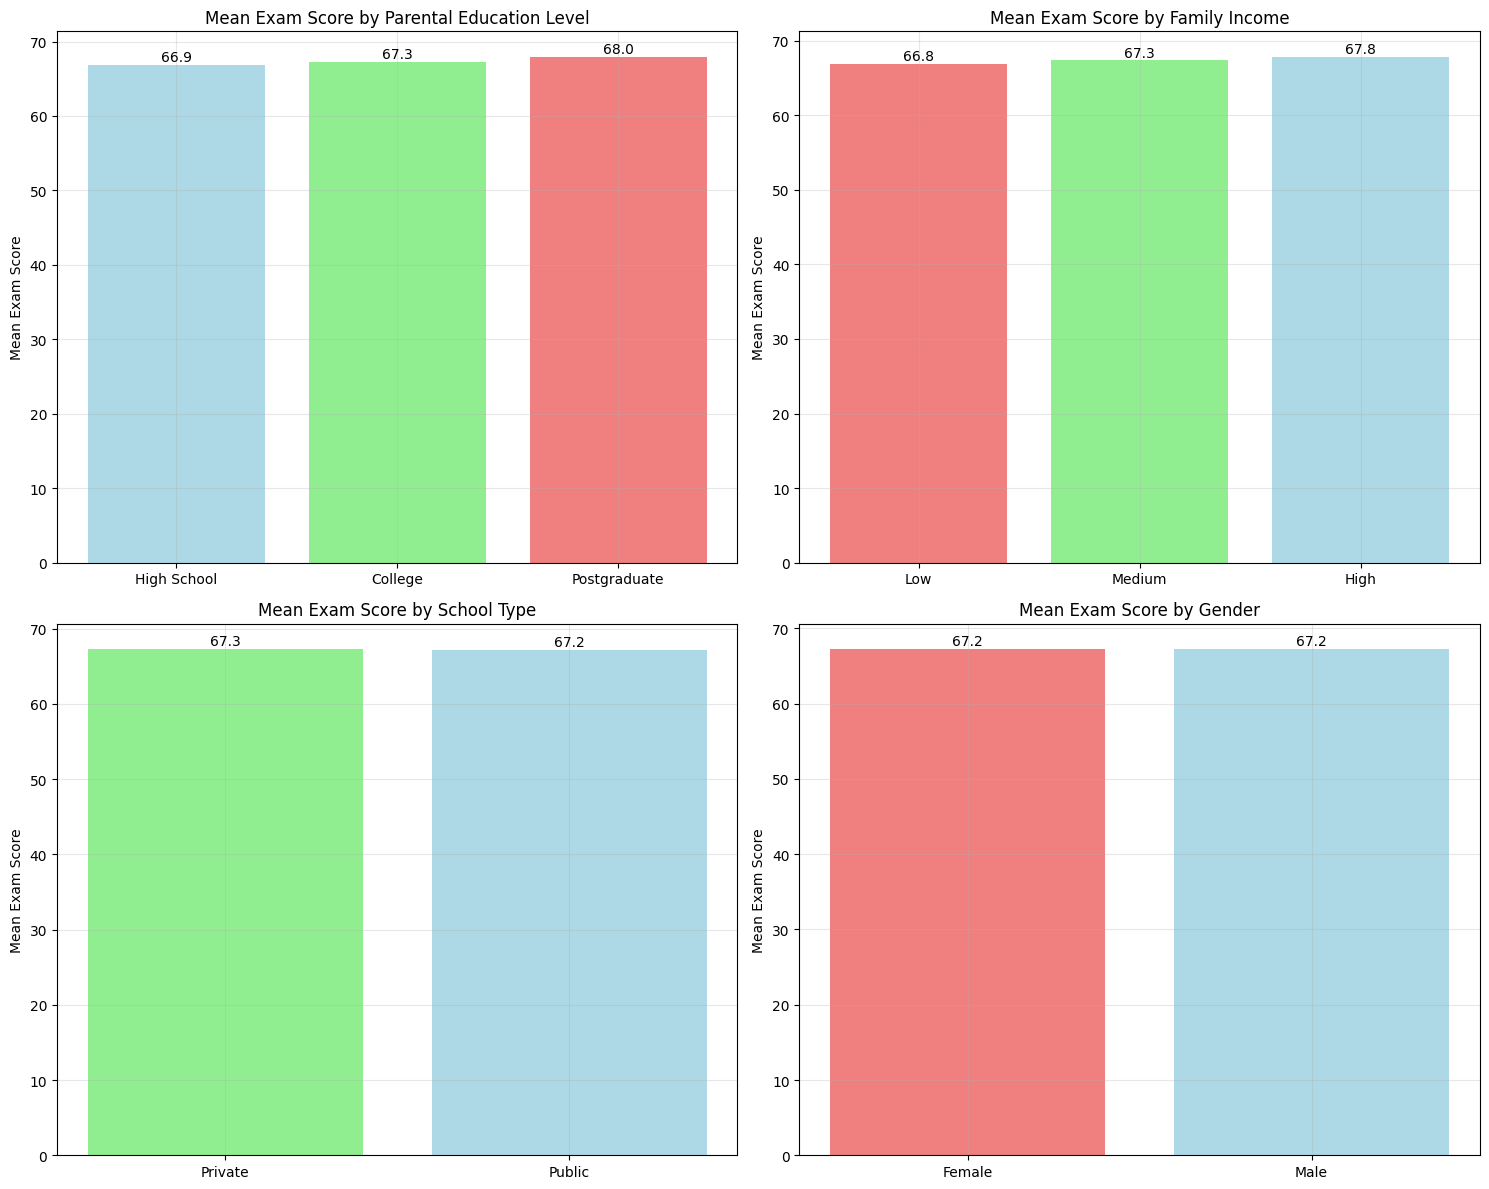

In [14]:
# 4. Bar charts for mean Exam Score by different categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Parental Education Level
education_means = df_encoded.groupby('Parental_Education_Level')['Exam_Score'].mean()
education_labels = ['High School', 'College', 'Postgraduate']
axes[0, 0].bar(education_labels, education_means.values, color=['lightblue', 'lightgreen', 'lightcoral'])
axes[0, 0].set_title('Mean Exam Score by Parental Education Level')
axes[0, 0].set_ylabel('Mean Exam Score')
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(education_means.values):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}', ha='center')

# Family Income
income_means = df_encoded.groupby('Family_Income')['Exam_Score'].mean()
income_labels = ['Low', 'Medium', 'High']
axes[0, 1].bar(income_labels, income_means.values, color=['lightcoral', 'lightgreen', 'lightblue'])
axes[0, 1].set_title('Mean Exam Score by Family Income')
axes[0, 1].set_ylabel('Mean Exam Score')
axes[0, 1].grid(True, alpha=0.3)
for i, v in enumerate(income_means.values):
    axes[0, 1].text(i, v + 0.5, f'{v:.1f}', ha='center')

# School Type (Note: School_Type_Public=1 means Public, School_Type_Public=0 means Private)
school_means = df_encoded.groupby('School_Type_Public')['Exam_Score'].mean()
school_labels = ['Private', 'Public']  # Order matches School_Type_Public values 0, 1
axes[1, 0].bar(school_labels, school_means.values, color=['lightgreen', 'lightblue'])
axes[1, 0].set_title('Mean Exam Score by School Type')
axes[1, 0].set_ylabel('Mean Exam Score')
axes[1, 0].grid(True, alpha=0.3)
for i, v in enumerate(school_means.values):
    axes[1, 0].text(i, v + 0.5, f'{v:.1f}', ha='center')

# Gender
gender_means = df_encoded.groupby('Gender_Male')['Exam_Score'].mean()
gender_labels = ['Female', 'Male']
axes[1, 1].bar(gender_labels, gender_means.values, color=['lightcoral', 'lightblue'])
axes[1, 1].set_title('Mean Exam Score by Gender')
axes[1, 1].set_ylabel('Mean Exam Score')
axes[1, 1].grid(True, alpha=0.3)
for i, v in enumerate(gender_means.values):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

### The story shown by these charts:

The bar charts quantify the real-world impact of background factors:

- Students’ average scores rise steadily with parental education level, from 66.8 for high school to 67.2 for college and 67.9 for postgraduate, a modest but meaningful one-point gain per level.
- Family income shows a similar pattern, with averages of 66.7 for low, 67.3 for medium, and 67.8 for high income families; the effect is clear but the overall range is only about one point.
- School type makes little difference, as private school students average 67.5 while public school students average 67.1, challenging assumptions about private school advantages.
- Gender shows virtually no difference at all, with both female and male students averaging 67.2, confirming equal academic potential across groups.

Ultimately, while socioeconomic factors do matter, their effects are smaller than many people assume. The differences are measured in single points rather than dramatic gaps, suggesting that individual effort and good habits can easily overcome background disadvantages.


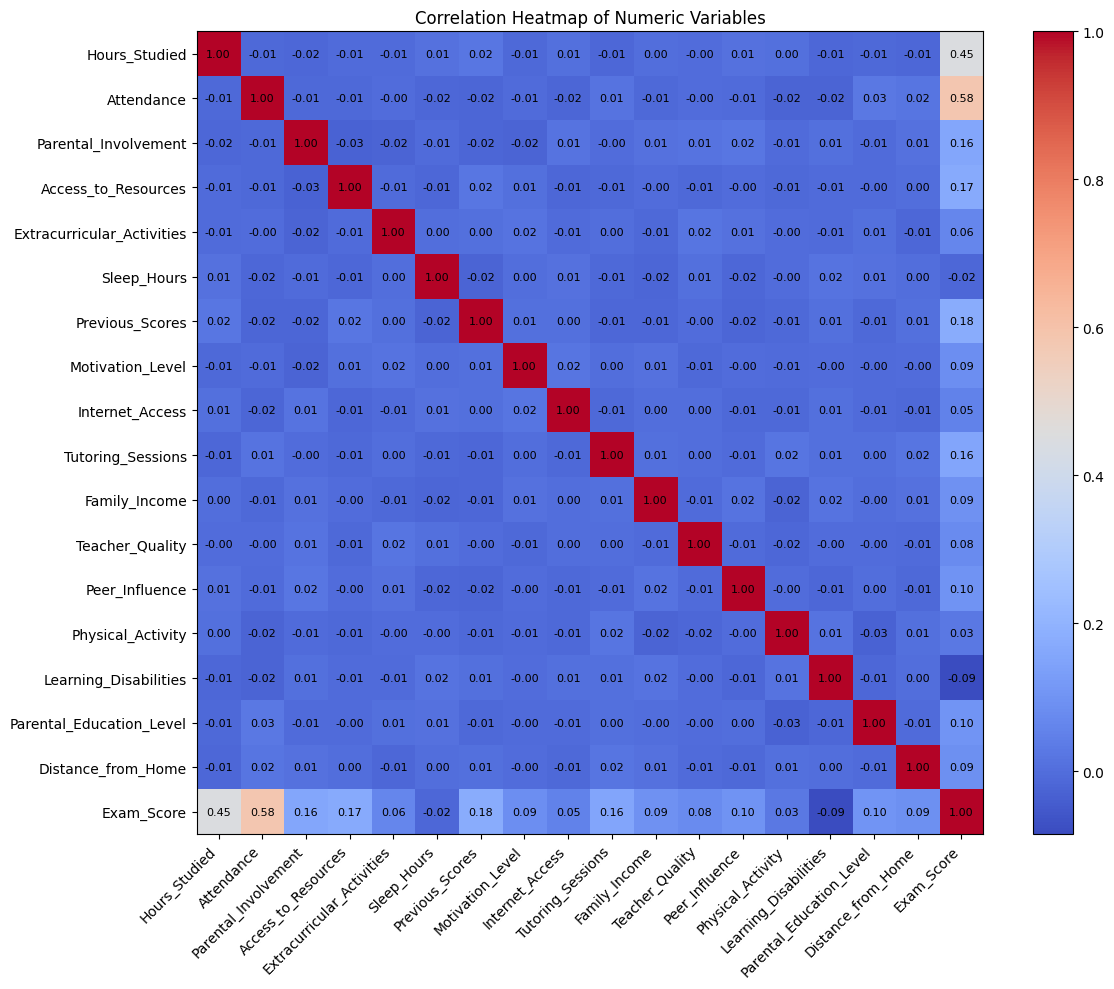


Top correlations with Exam Score:
Exam_Score                  1.000000
Attendance                  0.581072
Hours_Studied               0.445455
Previous_Scores             0.175079
Access_to_Resources         0.169770
Parental_Involvement        0.157114
Tutoring_Sessions           0.156525
Parental_Education_Level    0.103817
Peer_Influence              0.100217
Family_Income               0.094555
Name: Exam_Score, dtype: float64

Key Insights:
1. Strongest predictor: Attendance (0.581)
2. Second strongest: Hours_Studied (0.445)
3. Third strongest: Previous_Scores (0.175)


In [15]:
# 5. Correlation heatmap for numeric variables
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
correlation_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Heatmap of Numeric Variables')

# Add correlation values as text
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Show top correlations with Exam Score
exam_correlations = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("\nTop correlations with Exam Score:")
print(exam_correlations.head(10))

# Key insights from correlations
print(f"\nKey Insights:")
print(f"1. Strongest predictor: Attendance ({exam_correlations.iloc[1]:.3f})")
print(f"2. Second strongest: Hours_Studied ({exam_correlations.iloc[2]:.3f})")
print(f"3. Third strongest: Previous_Scores ({exam_correlations.iloc[3]:.3f})")

The heatmap highlights a clear hierarchy of factors linked to exam performance:

1. Attendance (0.581) is the strongest predictor, showing that consistent presence is the single most powerful driver of success.
2. Hours studied (0.445) follows, confirming that dedicated effort makes a significant difference.
3. Previous scores (0.175) provide some predictive value, but far less than many might expect.
4. Access to resources (0.170) adds measurable benefits.
5. Parental involvement (0.157) also contributes positively.
6. Tutoring sessions (0.157) deliver additional though modest support.

Some findings run counter to common assumptions. Sleep hours show minimal to no correlation, suggesting that sleep duration alone does not directly affect results. Physical activity has a similarly small effect. Socioeconomic factors overall show modest correlations, meaning they influence outcomes but do not determine them.

The most encouraging takeaway is that the top two predictors, attendance and study time, are completely within students’ control. Consistent effort and engagement matter more than background or past performance.

## Impact Section

### There's both pros and cons in terms of impact:

**Positive Applications**:
- Insights about optimal study time and the importance of parental involvement can inform educational policies and parent engagement programs.
- Understanding the factors that most strongly predict success can help schools target interventions more effectively.
- Findings about the importance of teacher quality and resource access can guide budget decisions.

**Potential Risks**:
- If educators or parents interpret these findings deterministically, they might lower expectations for certain groups of students.
- The complex nature of academic success might be reduced to simple formulas, ignoring individual circumstances.
- Focusing on easily measurable factors might divert attention from harder-to-measure but equally important factors like student well-being.

### Limitations and Potential Biases
There's a couple things we'd want to look out for, since the findings in this project isn't a silver-bullet to a student's academic performance.

**Dataset Limitations**:
- The dataset may not be representative of all student populations globally
- Self-reported data (like study hours and sleep) may be subject to recall bias
- The dataset doesn't capture cultural or regional differences in educational systems

**Correlation vs. Causation**:
- Our analysis shows correlations, not causal relationships
- For example, while parental involvement correlates with higher scores, we can't determine if involvement causes better performance or if better-performing students naturally receive more parental attention
- The strong correlation with previous scores suggests that some factors may be proxies for innate ability or long-term study habits

**Ethical Implications**:
- Our findings about socioeconomic factors could reinforce harmful stereotypes if misinterpreted. It's crucial to emphasize that individual effort and support systems can overcome economic disadvantages.
- While this dataset is anonymized, similar analyses on real student data must consider privacy implications.
- The findings about resource access and school type highlight existing educational inequalities that need addressing.

### Missing Perspectives

- Cultures - the dataset doesn't capture cultural differences in educational values and practices.
- Factors like stress, anxiety, and mental health conditions that significantly impact academic performance are not included. For example, some teachers might load more work onto students than other teachers who might be more lenient and relaxed.
- The dataset doesn't account for different learning preferences and styles that might affect how students respond to various factors.
- We only have a snapshot in time, missing how these relationships might change over a student's academic career.

## Conclusion

In short, it's super interesting looking at what actually drives student performance. The biggest surprise for me was how attendance turned out to be the strongest predictor - I honestly thought it would be study hours or something more "academic."

The aspect of socioeconomic factors having smaller effects than expected was also eye-opening. Like, sure, family income and parental education matter, but the differences are way smaller than I thought they'd be. It's actually pretty encouraging that individual effort can overcome background disadvantages.

If I had more time I would have dug deeper into some of the more complex relationships, like how different factors interact with each other. This dataset definitely challenged some of my assumptions about what makes students successful.

Thanks for reading :)


## References

1. The dataset source from Kaggle: StudentPerformanceFactors.csv - A comprehensive dataset of student performance factors
   - View here https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
2. Analysis Tools:
   - Pandas: Data manipulation and analysis
   - Matplotlib: Data visualization
   - NumPy: Numerical computations